In [12]:
%pylab inline
from scipy.integrate import odeint

Populating the interactive namespace from numpy and matplotlib


# MOULIN'S WATER LEVEL TIMESCALE FLUCTUATIONS


    1.Reservoir-constriction equation from eq(5a)&(5b)
    2.Creep equation from eq(6) in Covington(2012)-> derived from Spring&Hutter(1981), 
    and also used in Arnold et al.(1998) model
    
![title](SketchMoulin.png)

    Constants:
    g = 9.81 m/s2
    
    Fixed variables:
    R 
    
    

In [27]:
# RESERVOIR-CONSTRICTION
########################

# Constant:
g = 9.81 #m/s2


# Inputs
R = 10. #m^3/s


# Parameters of the moulin
Z = 1000. # m, thickness of the ice
r = 2. # m, radius of the moulin
Ar = pi*r**2. # m^2


# Parameters of the conduit
# Ac = pi*(D**2)/4. 
L = 1000. #m
f = 0.1 #unitless



# melt & creep
rhow = 1000. # kg/m^3, density of water
rhoi = 900. # kg/m^3, density of ice

# wrong Pw = # Conduit water pression = h
# wrong Pi = 500. # m, Ice overburden
Lf = 3.34*10.**5 # J/kg
n = 3. # Unitless, ice flow law exponent
B = 5.8*10.**7 # N/m^2*s, Arrhenius parameter

initialpara=[100.,3.] # initial h, initial conduit diameter

def dh_dt(parameter, time, args=()):
    Fh,FAc = parameter
    D = sqrt(FAc*4./pi)
    #FAc = pi*(D**2)/4.
    Cf = 1. + f*L/D
    Pwet = 2.*pi*D/2 # conduit wetted perimeter
    Q = FAc*sqrt(2.*g*Fh/Cf)
    Pw = rhow*g*Fh
    Pi = rhoi*g*Z    
    melt = (f*rhow*Pwet*Q**3.)/(8.*rhoi*Lf*FAc**3.)
    creep = 2.*(1./(n*B)**n)*FAc*(Pi-Pw)*abs(Pi-Pw)**(n-1.)
    return (R-Q)/Ar, melt-creep

# hours = 4 ;  duration = hours*3600
# tstep = duration/100

# t = linspace(0,duration,tstep)

t = linspace(0,100000,100)
result = odeint(dh_dt, initialpara, t, args=())


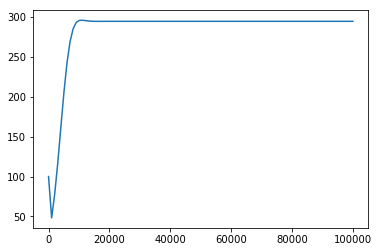

In [28]:
plot(t,result[:,0])